<a href="https://colab.research.google.com/github/vCalum/Intelligent-Robots-for-Design/blob/main/EG505P_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training program for neural network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

data=np.load('/content/drive/MyDrive/EG505P/data.npy')
target=np.load('/content/drive/MyDrive/EG505P/target.npy')
data.shape[1:]

(50, 50, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2048)                │      31,721,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,584,963 (124.30 MB)

 Trainable params: 32,584,963 (124.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=100) #50-100

Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.7514 - loss: 0.7076 - val_accuracy: 0.8464 - val_loss: 0.4286
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8486 - loss: 0.4562 - val_accuracy: 0.8881 - val_loss: 0.3266
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8744 - loss: 0.3690 - val_accuracy: 0.8859 - val_loss: 0.2925
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8805 - loss: 0.3439 - val_accuracy: 0.8990 - val_loss: 0.2847
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8937 - loss: 0.3078 - val_accuracy: 0.8917 - val_loss: 0.2668
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8933 - loss: 0.3023 - val_accuracy: 0.9056 - val_loss: 0.2448
Epoch 7/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9033 - loss: 0.2749 - val_accuracy: 0.9027 - val_loss: 0.2678
Epoch 8/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9017 - loss: 0.2

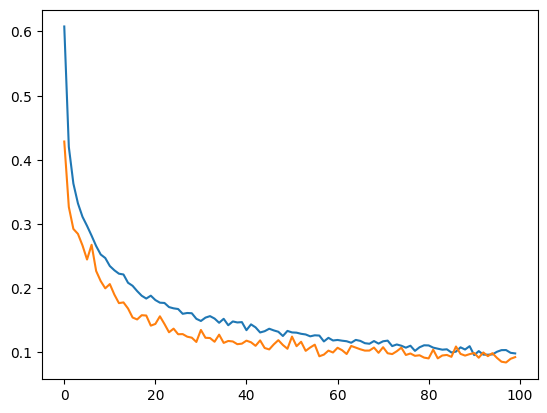

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

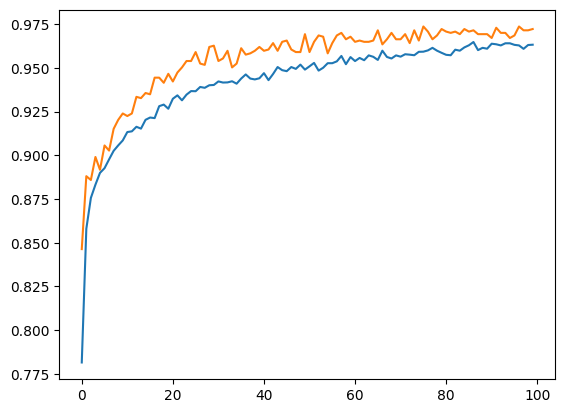

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
accc = model.evaluate(test_data,test_target)
print(accc)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9740 - loss: 0.0791
[0.09279625117778778, 0.9722018837928772]


In [ ]:
model.save(f'/content/drive/MyDrive/EG505P/model-{accc[1]}.h5')


model.save_weights(f'/content/drive/MyDrive/EG505P/model-{accc[1]}.weights.h5')